In [2]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'Emotion Data Set/train'
TEST_DIR = 'Emotion Data Set/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                                    image     label
0       images/validation\angry\10052.jpg     angry
1       images/validation\angry\10065.jpg     angry
2       images/validation\angry\10079.jpg     angry
3       images/validation\angry\10095.jpg     angry
4       images/validation\angry\10121.jpg     angry
...                                   ...       ...
7061  images/validation\surprise\9806.jpg  surprise
7062  images/validation\surprise\9830.jpg  surprise
7063  images/validation\surprise\9853.jpg  surprise
7064  images/validation\surprise\9878.jpg  surprise
7065   images/validation\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/validation\angry\10052.jpg
1         images/validation\angry\10065.jpg
2         images/validation\angry\10079.jpg
3         images/validation\angry\10095.jpg
4         images/validation\angry\10121.jpg
                       ...                 
7061    images/validation\surprise\9806.jpg
7062    images/validation\surprise\9830.jpg

In [9]:
from tqdm.notebook import tqdm

In [10]:
from PIL import Image

def load_grayscale_img(image_path):
    img = Image.open(image_path).convert('L')  # 'L' означает режим оттенков серого
    return img

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_grayscale_img(image)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [11]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

C:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 50, validation_data = (x_test,y_test)) 

Epoch 1/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 100s 436ms/step - accuracy: 0.2367 - loss: 1.8396 - val_accuracy: 0.2587 - val_loss: 1.8013
Epoch 2/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 101s 449ms/step - accuracy: 0.2472 - loss: 1.8002 - val_accuracy: 0.3033 - val_loss: 1.7028
Epoch 3/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 109s 484ms/step - accuracy: 0.3040 - loss: 1.7023 - val_accuracy: 0.4111 - val_loss: 1.5279
Epoch 4/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 102s 453ms/step - accuracy: 0.3849 - loss: 1.5712 - val_accuracy: 0.4536 - val_loss: 1.4158
Epoch 5/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 102s 451ms/step - accuracy: 0.4213 - loss: 1.4951 - val_accuracy: 0.4659 - val_loss: 1.3727
Epoch 6/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 103s 454ms/step - accuracy: 0.4336 - loss: 1.4558 - val_accuracy: 0.4949 - val_loss: 1.3014
Epoch 7/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 103s 455ms/step - accuracy: 0.4626 - loss: 1.3897 - val_accuracy: 0.5137 - val_loss: 1.2814
Epoch 8/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 103s 457ms/step - accuracy: 0.4739 -

In [21]:
model_json = model.to_json()
with open("emotiondetector2.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector2.h5")

In [22]:
from keras.models import model_from_json

In [23]:
json_file = open("emotiondetector2.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector2.h5")

In [38]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

221/221 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step


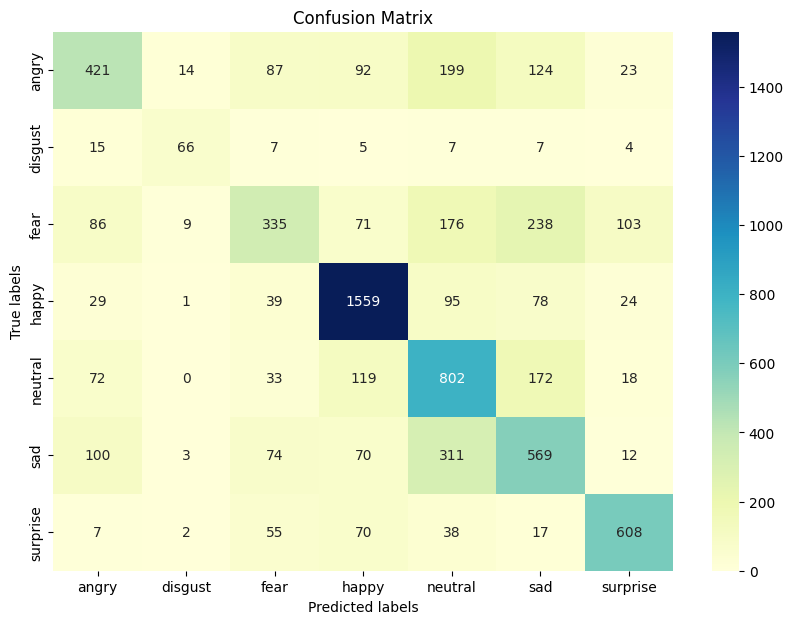

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [25]:
from PIL import Image

def ef(image_path):
    img = Image.open(image_path).convert('L')  # Open the image and convert it to grayscale
    img = img.resize((48, 48))  # Resize the image to the required dimensions
    feature = np.array(img)  # Convert the image to a numpy array
    feature = feature.reshape(1, 48, 48, 1)  # Reshape the array according to the model input shape
    return feature
    

In [26]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
model prediction is  angry


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
model prediction is  angry


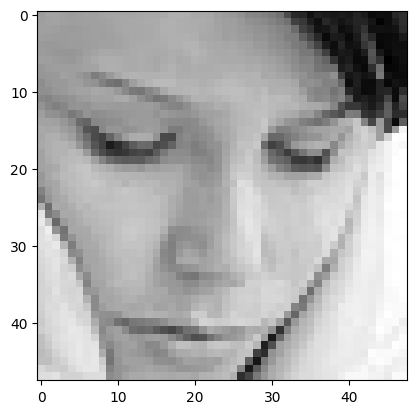

In [28]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
model prediction is  neutral


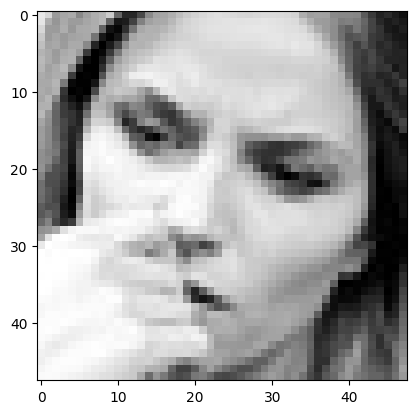

In [29]:
image = 'images/train/fear/2.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
model prediction is  happy


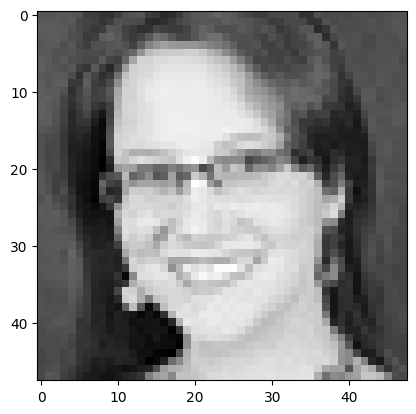

In [46]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
model prediction is  disgust


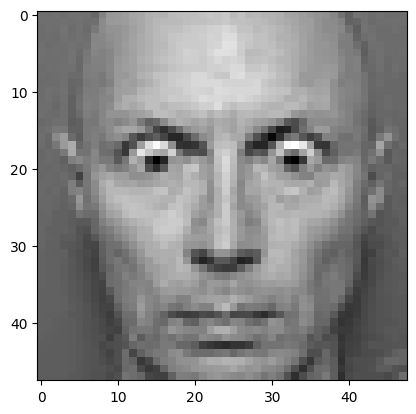

In [47]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')